# Semianr 8 - Applied Quantitative Logistics

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
random.seed(0)


## Traveling Salesman Problem

In [2]:
# list(np.random.permutation(15))

In [3]:
# print(list(np.random.randint(0, 1000, 100)))

In [4]:
# print(list(np.random.randint(0, 1000, 100)))

In [5]:
def tsp():
    
#     x = [24, 74, 83, 53, 7, 96, 10, 33, 53, 92, 13, 35, 97, 90, 97]
#     y = [77, 91, 60, 4, 93, 18, 18, 20, 89, 79, 62, 32, 65, 11, 62]
    x = [829, 550, 451, 614, 419, 471, 246, 987, 678, 647, 234, 412, 45, 575, 758, 434, 199, 617, 52, 555, 108, 513, 264, 198, 647, 522, 137, 445, 363, 518, 751, 554, 532, 914, 890, 591, 612, 878, 714, 713, 953, 533, 254, 740, 208, 355, 935, 440, 149, 843, 388, 402, 505, 40, 382, 505, 337, 496, 435, 513, 387, 438, 512, 249, 911, 912, 410, 762, 272, 822, 310, 801, 661, 659, 6, 205, 673, 522, 602, 752, 413, 747, 25, 926, 959, 565, 787, 76, 845, 976, 989, 593, 556, 990, 231, 38, 658, 697, 798, 690]
    y = [108, 455, 254, 250, 576, 229, 468, 14, 601, 822, 486, 28, 811, 833, 436, 844, 228, 257, 909, 7, 193, 132, 80, 182, 468, 512, 929, 134, 56, 448, 172, 383, 353, 213, 852, 989, 986, 720, 965, 452, 864, 692, 617, 71, 140, 36, 936, 40, 777, 975, 554, 985, 740, 443, 161, 953, 894, 994, 629, 397, 153, 41, 769, 602, 864, 507, 658, 251, 631, 132, 351, 160, 560, 992, 900, 120, 802, 798, 481, 246, 36, 712, 99, 64, 204, 925, 330, 780, 113, 671, 981, 283, 251, 599, 410, 386, 380, 919, 854, 730]
    
    n = len(x)
    
    d = np.zeros([n, n])
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            d[i][j] = math.sqrt((x[i] - x[j])**2 + (y[i]-y[j])**2)
            d[j][i] = d[i][j]
            
    xmin = 0
    xmax = 100
    
    ymin = 0
    ymax = 100
    
    model = {'n': n,
            'x': x,
            'y': y,
            'd': d,
            'xmin': xmin,
            'xmax': xmax,
            'ymin': ymin,
            'ymax': ymax}
        
    return model

In [6]:
# model = tsp()

### Create Random Solution

In [7]:
def createRandomSolution(model):
    n = model['n']
    sol = list(np.random.permutation(n))
    return sol

### Calculating the Length - Cost Function

In [8]:
def TourLength(tour, model):
    n = model['n']
    length = tour.copy()
    length.append(tour[0])
    
    L = 0
    
    for k in range(0, n):
        i = length[k]
        j = length[k+1]
        
        L = L + model['d'][i][j]

    return L

### Roullete Wheele Selection

In [9]:
def rouletteWheelSelection(p):
    r = random.random()
    
    c = np.cumsum(p)
    
    indexes = [
        index for index in range(len(c))
        if c[index] > r
    ]
    
    return indexes[0]

### Mutation

In [10]:
def ApplySwap(tour1):
    
    n = model['n']
    I = random.sample(range(0, n-1), 2)
    
    i1 = I[0]
    i2 = I[1]
    
    tour2 = tour1.copy()
    tour2[i1] = tour1[i2]
    tour2[i2] = tour1[i1]
    
    return tour2

# ------------------------------------------------------

def ApplyReversion(tour1):
    
    n = model['n']
    I = random.sample(range(0,n-1), 2)
    
    i1 = min(I)
    i2 = max(I)
    
    tour2 = tour1.copy()
    
    tour2[i1:i2] = tour2[i1:i2][::-1]
    
    return tour2

# ------------------------------------------------------

def ApplyInsertion(tour1):
    
    n = model['n']
    I = random.sample(range(0, n-1), 2)
    
    i1 = I[0]
    i2 = I[1]
    
    tour2 = tour1.copy()
    
    if i1<i2:
        tour2.insert(i2+1, tour2[i1])
        tour2.pop(i1)
    else:
        tour2.insert(i2+1, tour2[i1])
        tour2.pop(i1+1)
    return tour2

# ------------------------------------------------------

def CreateNeighbor(tour1):
    pSwap = 0.2
    pReversion = 0.5
    pInsertion = 1 - pSwap - pReversion
    
    p = [pSwap, pReversion, pInsertion]
    
    METHOD = rouletteWheelSelection(p)
    
    if METHOD == 0:
        tour2 = ApplySwap(tour1)
    elif METHOD == 1:
        tour2 = ApplyReversion(tour1)
    elif METHOD == 2:
        tour2 = ApplyInsertion(tour1)
        
    return tour2

## Simmulated Annealing (SA)

In [11]:
def SAAlgorithm(model, maxIt=10000, T0=100, alpha=0.99):

    # Initialization
    sol = createRandomSolution(model)
    cost = TourLength(sol, model)

    BestSol = sol
    BestCost = cost

    BestCost_list = np.zeros(maxIt -1)     # Array to hold the best results

    T = T0

    for it in tqdm(range(1, maxIt)):
        # Generate a new solution
        newsol = CreateNeighbor(sol)
        newcost = TourLength(newsol, model)

        # If the new solution is better, accept it
        if newcost <= cost:
            sol = newsol
            cost = newcost
        # If the new solution is worse, accept it with a certain probability that decreases with temperature
        else:
            DELTA = newcost - cost
            P = math.exp(-DELTA/T)

            r = np.random.random()

            if P >= r:
                sol = newsol
                cost = newcost

        # Save the best solution found so far
        if cost <= BestCost:
            BestSol = sol
            BestCost = cost

        # Save the best cost found at this iteration
        BestCost_list[it-1] = TourLength(BestSol, model)
        
        # Display Iteration Information
        #print(f'Iteration: {it}, BestCost = {BestCost_list[it-1]}')

        # Update the temperature
        T = alpha*T
    print(f'Iteration: {it+1}, BestCost = {BestCost_list[it-1]}')

    return BestCost_list, BestSol


# HW5 - Applied Quantitative Logistics

   1) Implement crossover PMX for Genetic Algorithm which is presented in the paper [Genetic Algorithm Solution of the TSP Avoiding Special Crossover and Mutation](https://user.ceng.metu.edu.tr/~ucoluk/research/publications/tspnew.pdf)

   2) Compaire Simmulated Anneling with Genetic Algorithm for TSP problem (Better to investigate with different parameters to find proper parameters for the current problem)

   3) Draw the results on the same plot.

   4) Explain your analysis and conclusion based on your experiment.

Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **April 20, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW5_AQL]-YOUR_NAME**

### Results

In [12]:
model = tsp()

In [13]:
maxIt=10000
T0=100
alpha=0.99

BestCost_list1, BestSol1 = SAAlgorithm(model, maxIt, T0, alpha)


100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 7155.88it/s]

Iteration: 10000, BestCost = 9928.289453439313


In [14]:
maxIt=10000
T0=1000
alpha=0.99

BestCost_list2, BestSol2 = SAAlgorithm(model, maxIt, T0, alpha)

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6905.23it/s]

Iteration: 10000, BestCost = 9500.724992705542


In [15]:
maxIt=100000
T0=100
alpha=0.99

BestCost_list3, BestSol3 = SAAlgorithm(model, maxIt, T0, alpha)

 70%|████████████████████████▌          | 70058/99999 [00:09<00:04, 7319.61it/s]/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_34899/904132233.py:26: RuntimeWarning: overflow encountered in scalar divide
  P = math.exp(-DELTA/T)
100%|███████████████████████████████████| 99999/99999 [00:13<00:00, 7198.44it/s]

Iteration: 100000, BestCost = 8073.989219378346


In [16]:
maxIt=100000
T0=1000
alpha=0.99

BestCost_list4, BestSol4 = SAAlgorithm(model, maxIt, T0, alpha)

 70%|████████████████████████▋          | 70473/99999 [00:09<00:04, 7276.74it/s]/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_34899/904132233.py:26: RuntimeWarning: overflow encountered in scalar divide
  P = math.exp(-DELTA/T)
100%|███████████████████████████████████| 99999/99999 [00:13<00:00, 7152.45it/s]

Iteration: 100000, BestCost = 8041.314691834189


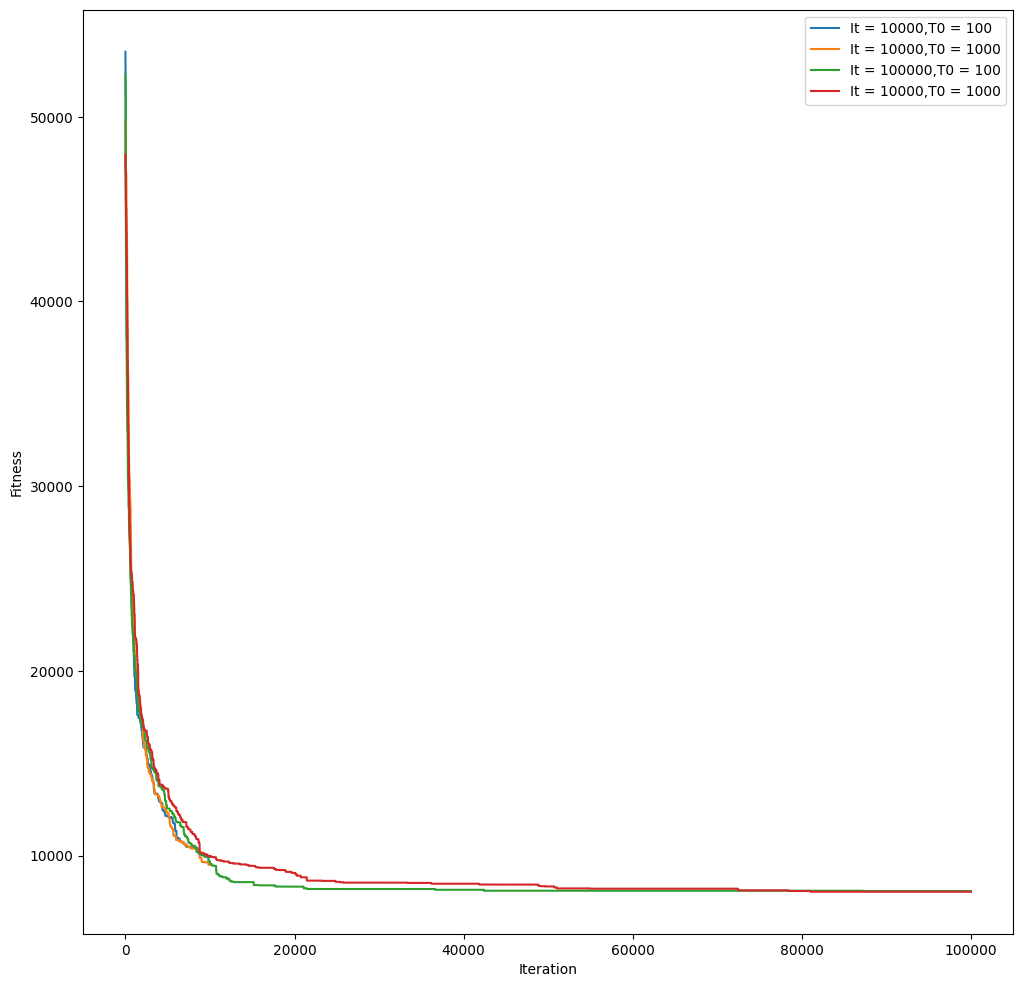

In [17]:
# Plot the result
plt.figure(figsize=(12, 12))
plt.plot(BestCost_list1, label = "It = 10000,T0 = 100")
plt.plot(BestCost_list2, label = "It = 10000,T0 = 1000")
plt.plot(BestCost_list3, label = "It = 100000,T0 = 100")
plt.plot(BestCost_list4, label = "It = 10000,T0 = 1000")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

# Genetic Algorithm

In [18]:
def singlePointPmxCrossover(solution1, solution2):
    cx_point = random.randint(0, len(solution1) - 1)
    child = solution1.copy()
    value = solution2[cx_point]
    index = solution1.index(value)
    child[cx_point], child[index] = child[index], child[cx_point]

    return child

In [19]:
def twoPointPmxCrossover(solution1, solution2):
    cx_point1, cx_point2 = sorted(random.sample(range(len(solution1)), 2))
    child = solution1.copy()
    for i in range(cx_point1, cx_point2):
        value = solution2[i]
        new_index = solution1.index(value)
        child[i], child[new_index] = child[new_index], child[i]
    return child

In [20]:
def select_crossover():
    crossover_functions = [singlePointPmxCrossover, twoPointPmxCrossover]
    crossover_probabilities = [0.1, 0.9] 
    index = rouletteWheelSelection(crossover_probabilities)
    return crossover_functions[index]


In [21]:
def swapMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[index1], solution[index2] = solution[index2], solution[index1]
    return solution

In [22]:
def reversionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[min(index1, index2):max(index1, index2)+1] = solution[min(index1, index2):max(index1, index2)+1][::-1]
    return solution

In [23]:
def insertionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    value = solution.pop(index1)
    solution.insert(index2, value)
    return solution

In [24]:
def mutationSelector():
    probabilities = [0.33, 0.34, 0.33]
    method_index = rouletteWheelSelection(probabilities)
#    print("method_index",method_index)
    if method_index == 0:
        return swapMutation
    elif method_index == 1:
        return reversionMutation
    else:
        return insertionMutation
 

In [25]:
def tournamentSelection(population, fitness, tournamentSize):
    tournament = random.sample(range(len(population)), tournamentSize)
    fittest = tournament[0]
    for i in tournament[1:]:
        if fitness[i] < fitness[fittest]:
            fittest = i
    return population[fittest]

In [26]:
def GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize):
    # Initialize the population
    population = [createRandomSolution(model) for i in range(populationSize)]
#    print("population",population)
    # Evaluate the fitness of each solution
    fitness = [TourLength(sol, model) for sol in population]
    
    # Store the best fitness and solution found so far
    bestFitness = min(fitness)
    bestSolution = population[fitness.index(bestFitness)]
    
    # Create arrays to store the best fitness and average fitness at each iteration
    bestFitnessList = [bestFitness]
    avgFitnessList = [np.mean(fitness)]
    
    # Start the iterations
    for it in tqdm(range(maxIterations)):
        # Select two parents for each offspring using tournament selection
        offspring = []
        for i in range(populationSize):
            parent1 = tournamentSelection(population, fitness, tournamentSize)
            parent2 = tournamentSelection(population, fitness, tournamentSize)

            # PMX-Crossover
            if random.random() < crossoverRate:
                crossover = select_crossover()
                child  = crossover(parent1, parent2)
            else:
                child = random.choice([parent1, parent2]).copy()
            
            # Mutation
            if random.random() < mutationRate:
                mutationMethod = mutationSelector()
                child = mutationMethod(child)
                
            # Add the child solution to the offspring
            offspring.append(child)    
        
        # Merge the original population and offspring
        mergedPopulation = population + offspring
        
        # Shuffle the merged population
        random.shuffle(mergedPopulation)
        
        # Select the first populationSize elements as the new population
        population = mergedPopulation[:populationSize]

        # Evaluate the fitness of each solution
        fitness = [TourLength(sol, model) for sol in population]
        
        # Update the best fitness and solution found so far
        if min(fitness) < bestFitness:
            bestFitness = min(fitness)
            bestSolution = population[fitness.index(bestFitness)]
            
        # Store the best fitness and average fitness at each iteration
        bestFitnessList.append(bestFitness)
        avgFitnessList.append(np.mean(fitness))
        
        # Print the best fitness at this iteration
        #print("Iteration ", it+1, ": Best Fitness = ", bestFitness,": Best Solution = ", bestSolution)
    
    # Print the best fitness overall
    print("Best Solution : ", bestSolution,"Best Fitness =",bestFitness )  
    # Plot the convergence curve
    plt.plot(range(maxIterations+1), bestFitnessList, label='Best')
    plt.plot(range(maxIterations+1), avgFitnessList, label='Average')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.show()
    ### Results
    # Return the best solution found
    return bestFitnessList


### Results

100%|█████████████████████████████████████| 10000/10000 [01:41<00:00, 98.18it/s]


Best Solution :  [77, 13, 85, 55, 57, 35, 36, 73, 38, 97, 9, 76, 99, 81, 98, 49, 90, 46, 40, 64, 34, 37, 89, 93, 65, 33, 84, 7, 83, 88, 0, 69, 71, 30, 43, 19, 47, 61, 80, 11, 28, 45, 22, 75, 44, 54, 60, 27, 21, 5, 2, 32, 59, 31, 96, 91, 92, 3, 17, 79, 67, 86, 14, 39, 8, 72, 24, 78, 1, 29, 25, 58, 66, 4, 50, 68, 42, 63, 10, 6, 94, 70, 16, 23, 20, 82, 95, 53, 48, 87, 12, 74, 18, 26, 56, 51, 15, 52, 41, 62] Best Fitness = 8332.033215366846


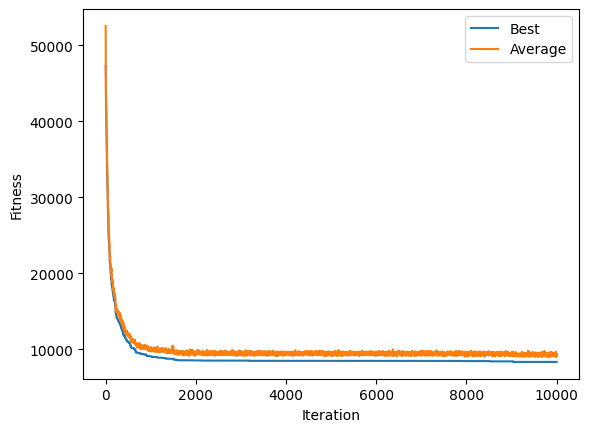

In [41]:
model = tsp()
populationSize = 50
maxIterations = 10000
tournamentSize = 20
crossoverRate = 0.8
mutationRate = 0.8
bestFitnessList7 = GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize)

100%|███████████████████████████████████| 100000/100000 [17:02<00:00, 97.81it/s]


Best Solution :  [89, 93, 65, 14, 86, 33, 84, 7, 83, 88, 0, 69, 71, 43, 30, 67, 79, 17, 3, 92, 91, 96, 39, 8, 72, 24, 78, 25, 1, 29, 59, 31, 32, 2, 5, 27, 21, 19, 47, 61, 80, 11, 45, 28, 60, 54, 22, 75, 44, 82, 20, 23, 16, 70, 50, 4, 58, 66, 41, 52, 62, 77, 13, 15, 68, 42, 63, 10, 6, 94, 95, 53, 48, 87, 12, 74, 18, 26, 56, 51, 57, 55, 85, 35, 36, 73, 38, 97, 9, 76, 99, 81, 98, 49, 90, 46, 40, 64, 34, 37] Best Fitness = 8369.153742407681


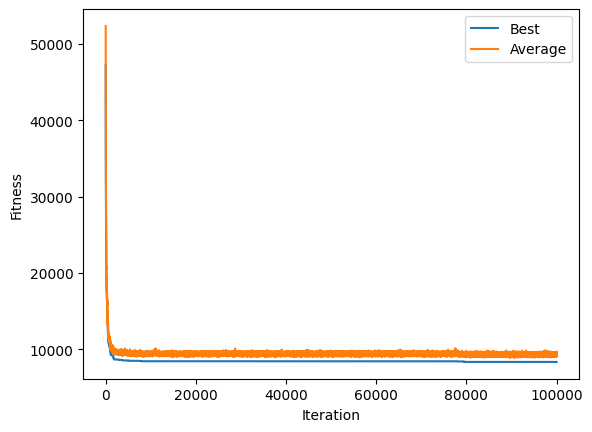

In [38]:
model = tsp()
populationSize = 50
maxIterations = 100000
tournamentSize = 20
crossoverRate = 0.8
mutationRate = 0.8
bestFitnessList8 = GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize)

100%|█████████████████████████████████████| 10000/10000 [03:28<00:00, 48.07it/s]


Best Solution :  [16, 23, 54, 60, 27, 47, 61, 80, 11, 28, 45, 22, 75, 44, 82, 20, 95, 53, 94, 6, 10, 63, 42, 68, 48, 87, 12, 74, 18, 26, 56, 15, 51, 57, 55, 85, 35, 36, 73, 97, 38, 49, 90, 46, 40, 64, 34, 98, 76, 9, 13, 77, 62, 52, 41, 66, 58, 4, 50, 25, 29, 1, 78, 24, 72, 8, 99, 81, 37, 89, 93, 65, 14, 39, 96, 86, 67, 79, 30, 71, 33, 84, 7, 83, 88, 0, 69, 43, 19, 21, 5, 2, 92, 3, 17, 91, 32, 31, 59, 70] Best Fitness = 8102.514366152567


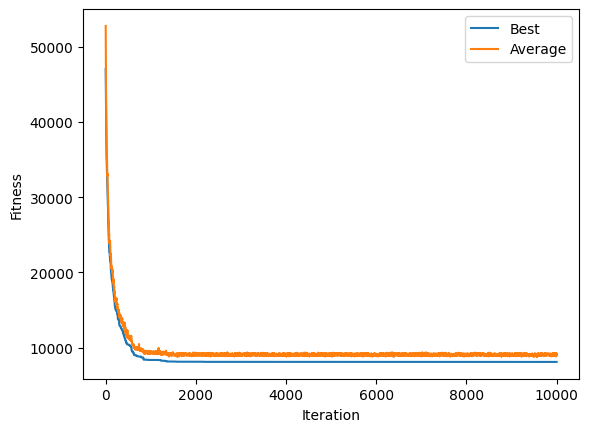

In [35]:
model = tsp()
populationSize = 100
maxIterations = 10000
tournamentSize = 20
crossoverRate = 0.8
mutationRate = 0.8
bestFitnessList2 = GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize)

100%|███████████████████████████████████| 100000/100000 [39:56<00:00, 41.73it/s]


Best Solution :  [86, 14, 39, 72, 8, 99, 81, 98, 34, 64, 49, 90, 46, 40, 37, 89, 93, 65, 33, 84, 7, 83, 88, 0, 69, 71, 30, 43, 19, 47, 61, 80, 11, 28, 45, 22, 75, 44, 82, 20, 16, 23, 54, 60, 27, 21, 5, 2, 32, 31, 59, 70, 94, 95, 53, 10, 6, 50, 4, 58, 66, 68, 42, 63, 48, 87, 12, 74, 18, 26, 56, 15, 51, 57, 55, 85, 35, 36, 73, 38, 97, 76, 9, 13, 77, 62, 52, 41, 25, 29, 1, 78, 24, 96, 91, 92, 3, 17, 79, 67] Best Fitness = 8397.380473978796


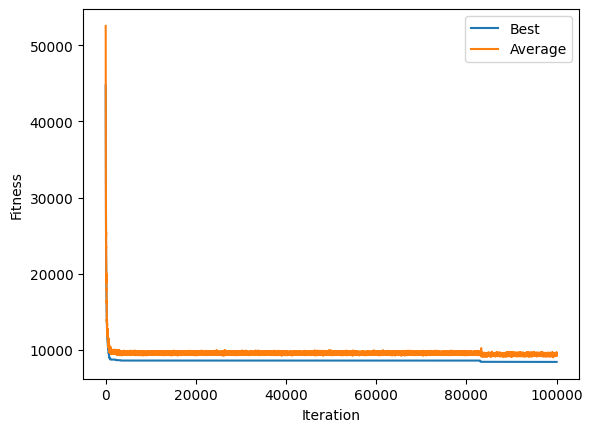

In [42]:
model = tsp()
populationSize = 100
maxIterations = 100000
tournamentSize = 20
crossoverRate = 0.8
mutationRate = 0.8
bestFitnessList5 = GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize)

100%|█████████████████████████████████████| 10000/10000 [11:04<00:00, 15.04it/s]


Best Solution :  [41, 66, 58, 4, 50, 25, 1, 29, 59, 31, 32, 2, 5, 54, 60, 27, 21, 92, 3, 17, 91, 96, 39, 24, 78, 72, 8, 81, 99, 76, 9, 13, 85, 35, 36, 73, 38, 97, 98, 49, 90, 46, 40, 64, 34, 37, 89, 93, 65, 14, 86, 67, 79, 30, 71, 33, 84, 7, 83, 88, 0, 69, 43, 19, 47, 61, 80, 11, 28, 45, 22, 75, 44, 23, 16, 20, 82, 95, 53, 94, 70, 6, 10, 63, 42, 68, 48, 87, 12, 74, 18, 26, 56, 51, 57, 55, 15, 77, 62, 52] Best Fitness = 7879.807400365998


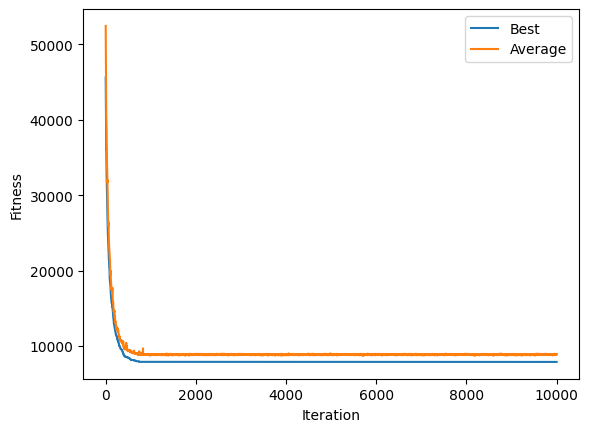

In [50]:
model = tsp()
populationSize = 500
maxIterations = 10000
tournamentSize = 20
crossoverRate = 0.8
mutationRate = 0.8
bestFitnessList4 = GeneticAlgorithm(model, populationSize, maxIterations, crossoverRate, mutationRate, tournamentSize)

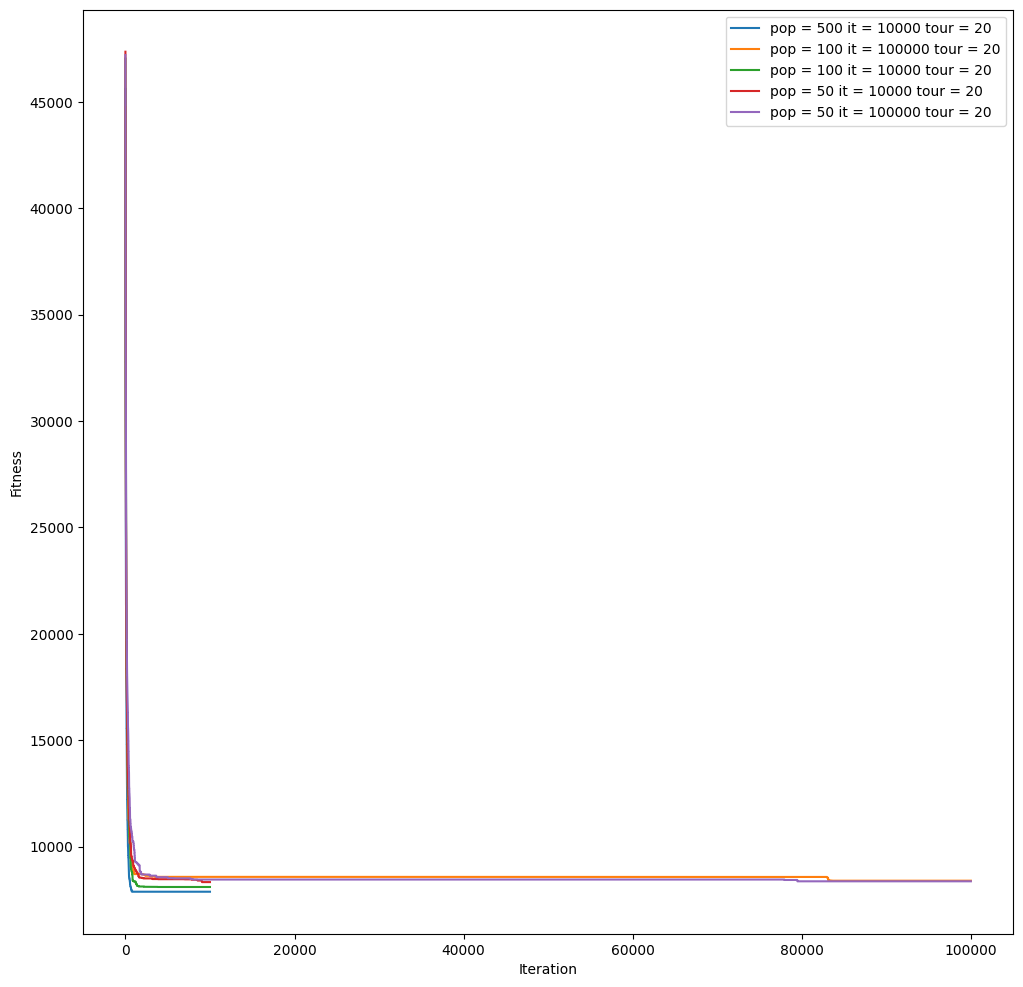

In [51]:
# Plot the result
plt.figure(figsize=(12, 12))
plt.plot(bestFitnessList4, label='pop = 500 it = 10000 tour = 20')
plt.plot(bestFitnessList5, label='pop = 100 it = 100000 tour = 20')
plt.plot(bestFitnessList2, label='pop = 100 it = 10000 tour = 20')
plt.plot(bestFitnessList7, label='pop = 50 it = 10000 tour = 20')
plt.plot(bestFitnessList8, label='pop = 50 it = 100000 tour = 20')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

# Results Comparison

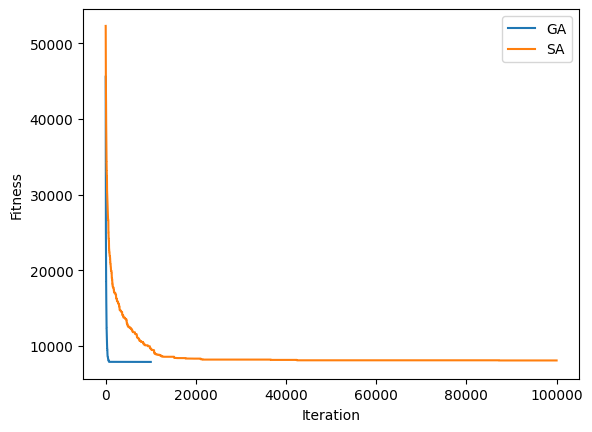

In [52]:
# Plot the best fitness values of GA and SA
plt.plot(bestFitnessList4, label='GA')
plt.plot(BestCost_list3, label='SA')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

# Results overall
## 1. The speed of SA is must faster than it of GA.
## 2. Time complexity of GA is much higher than it of SA.
## 3. GA converges must faster than SA.
## 4. Results of GA and SA don't differ a lot while the result of SA is little better

# Conclusion
## 1. SA might be a better option here for overall better performance.
## 2. Tournament selection influences GA a lot, it has to be optimized.
